 
# Exploratory Data Analysis : Demographic County Data
## Preliminary
As part of a team project where we are comparing county shutdowns with google mobility data, it is important to understand the demographics of the 
Texas counties we are looking at. So we are using Census data about the specified counties for which we have a defined shutdown range.
 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Info about the Texas Demographic Data
df_demo=pd.read_csv('./data/cc-est2019-alldata-48.csv')
print('Demographic: ', df_demo.shape, df_demo.columns)


Demographic:  (57912, 80) Index(['SUMLEV', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'YEAR', 'AGEGRP',
       'TOT_POP', 'TOT_MALE', 'TOT_FEMALE', 'WA_MALE', 'WA_FEMALE', 'BA_MALE',
       'BA_FEMALE', 'IA_MALE', 'IA_FEMALE', 'AA_MALE', 'AA_FEMALE', 'NA_MALE',
       'NA_FEMALE', 'TOM_MALE', 'TOM_FEMALE', 'WAC_MALE', 'WAC_FEMALE',
       'BAC_MALE', 'BAC_FEMALE', 'IAC_MALE', 'IAC_FEMALE', 'AAC_MALE',
       'AAC_FEMALE', 'NAC_MALE', 'NAC_FEMALE', 'NH_MALE', 'NH_FEMALE',
       'NHWA_MALE', 'NHWA_FEMALE', 'NHBA_MALE', 'NHBA_FEMALE', 'NHIA_MALE',
       'NHIA_FEMALE', 'NHAA_MALE', 'NHAA_FEMALE', 'NHNA_MALE', 'NHNA_FEMALE',
       'NHTOM_MALE', 'NHTOM_FEMALE', 'NHWAC_MALE', 'NHWAC_FEMALE',
       'NHBAC_MALE', 'NHBAC_FEMALE', 'NHIAC_MALE', 'NHIAC_FEMALE',
       'NHAAC_MALE', 'NHAAC_FEMALE', 'NHNAC_MALE', 'NHNAC_FEMALE', 'H_MALE',
       'H_FEMALE', 'HWA_MALE', 'HWA_FEMALE', 'HBA_MALE', 'HBA_FEMALE',
       'HIA_MALE', 'HIA_FEMALE', 'HAA_MALE', 'HAA_FEMALE', 'HNA_MALE',
       'HNA_FEMALE',

In [5]:
df_demo.head()

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
0,50,48,1,Texas,Anderson County,1,0,58458,35521,22937,...,5784,2707,321,129,182,88,188,34,82,28
1,50,48,1,Texas,Anderson County,1,1,3135,1566,1569,...,385,313,22,27,13,9,8,7,3,2
2,50,48,1,Texas,Anderson County,1,2,3258,1729,1529,...,375,324,17,16,12,11,1,7,9,5
3,50,48,1,Texas,Anderson County,1,3,3156,1573,1583,...,283,315,21,17,11,11,3,3,2,4
4,50,48,1,Texas,Anderson County,1,4,3107,1676,1431,...,324,255,7,12,11,13,4,1,2,2


In [6]:
df_demo.tail()

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
57907,50,48,507,Texas,Zavala County,12,14,565,272,293,...,244,263,3,1,4,4,1,1,1,1
57908,50,48,507,Texas,Zavala County,12,15,461,203,258,...,180,240,1,0,4,0,1,1,0,1
57909,50,48,507,Texas,Zavala County,12,16,306,135,171,...,118,153,0,0,0,2,0,0,0,0
57910,50,48,507,Texas,Zavala County,12,17,191,82,109,...,72,99,0,0,0,0,0,0,0,0
57911,50,48,507,Texas,Zavala County,12,18,200,76,124,...,66,112,0,0,1,0,0,1,0,0


In [7]:
# According to the County Characteristics, year 1 is the 2010 Census Population and 
# years 2&3 is estimates base and estimate for 2010,
# years 4-12 represent Population estimates for years 2011 - 2019.  
# I'm going to drop years 2 and 3 and change the entry to the the year of estimation
notneeded = df_demo[(df_demo['YEAR']==2) | (df_demo['YEAR']==3)].index
df_demo.drop(notneeded, inplace=True)
convert_year_nums = {'YEAR': {1:2010, 4:2011, 5:2012, 6:2013, 7:2014, 8:2015, 
                             9:2016, 10:2017, 11:2018, 12:2019}}
df_demo.replace(convert_year_nums, inplace=True)
df_demo['YEAR'].unique()


array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
      dtype=int64)

In [8]:
# Number of counties in the dataset 
print('Total number of Texas Counties in dataset: ', df_demo.groupby('COUNTY').ngroups)

Total number of Texas Counties in dataset:  254


In [9]:
# Since I'm not interested in all counties, but a specific list of counties and
# Since the column for COUNTY and state reference a County Code, we will create a County Name column 
# with a data set of Texas Counties as found on the State Education website
# load the counties csv
TX_counties = pd.read_csv('./data/Counties.csv')
TX_counties.head()
#pull out only the country code and its associated name
County_Names = TX_counties.loc[:, 'FIPS':'FENAME']
# Merge the df_demo with the added columns from County_Name on FIPS ... County Code
df_demo_counties = pd.merge(left=df_demo, right=County_Names, left_on='COUNTY', right_on='FIPS')
# Since only have shutdown information from only a few of the 254 counties in TX
# We only want to look at the information for those counties
spec_counties = ['BELL','BEXAR','BOWIE','BRAZORIA','BRAZOS','HARRIS','CASTRO',
                 'CHAMBERS','COLLIN','Comal','DALLAS','DENTON','ELLIS','EL PASO']
df_spec_counties = df_demo_counties[df_demo_counties['FENAME'].isin(spec_counties)].reset_index(drop=True)
#df_spec_counties = df_spec_counties.rename(columns={'FENAME': 'County Name'})



In [10]:
print('Total number of Special Texas Counties in dataset: ', df_spec_counties.groupby('CTYNAME').ngroups)
df_spec_counties['CTYNAME'].unique()

Total number of Special Texas Counties in dataset:  13


array(['Bell County', 'Bexar County', 'Bowie County', 'Brazoria County',
       'Brazos County', 'Castro County', 'Chambers County',
       'Collin County', 'Dallas County', 'Denton County', 'Ellis County',
       'El Paso County', 'Harris County'], dtype=object)

In [11]:
# Group the rows by County and Year, then sum the columns so I don't have to look at the data by age group
grouped_spec_counties = df_spec_counties.groupby(['FENAME', 'YEAR'])
df=grouped_spec_counties.sum()
df = df.reset_index()


C:\Users\kymno\AppData\Local\Temp\ipykernel_20992\1996335248.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=grouped_spec_counties.sum()


In [12]:
df.head()

,FENAME,YEAR,SUMLEV,STATE,COUNTY,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,...,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE,FIPS
0,BELL,2010,950,912,513,171,620470,306928,313542,213000,...,57082,6846,7796,2780,2864,1682,1638,786,808,513
1,BELL,2011,950,912,513,171,631598,312510,319088,216282,...,60456,7156,8228,3042,2992,1560,1616,730,744,513
2,BELL,2012,950,912,513,171,649926,325754,324172,225638,...,62722,7456,8448,3084,3000,1646,1746,780,742,513
3,BELL,2013,950,912,513,171,654056,327556,326500,226222,...,64480,7560,8646,3130,3080,1648,1736,752,754,513
4,BELL,2014,950,912,513,171,660298,330636,329662,226418,...,66340,7892,8898,3210,3156,1720,1736,786,776,513


In [13]:
# Population Breakdown per County
df.groupby(['FENAME']).TOT_POP.mean().sort_values(ascending=False)

FENAME
HARRIS      8915490.0
DALLAS      5054200.0
BEXAR       3740483.4
COLLIN      1808216.6
EL PASO     1659562.2
DENTON      1541433.2
BRAZORIA     685476.6
BELL         670208.4
BRAZOS       424111.6
ELLIS        327943.0
BOWIE        186382.0
CHAMBERS      77898.0
CASTRO        15766.2
Name: TOT_POP, dtype: float64

In [14]:
# Since population is broken up in terms of male and female for ethnicity groups
#I want to add a total value per ethnicity groups
df['BA_All'] = df['BA_FEMALE']+df['BA_MALE'] # black only
df['WA_All'] = df['WA_FEMALE']+df['WA_MALE'] # white only
df['H_All'] = df['H_FEMALE']+df['H_MALE']    # hispanic
df['AA_All'] = df['AA_FEMALE']+df['AA_MALE'] # asian only
df['IAC_All'] = df['IAC_FEMALE']+df['IAC_MALE']# american indian or alaska native in combo
df['HBA_All'] = df['HBA_FEMALE']+df['HBA_MALE'] #hispanic or black 
df['NHBA_All'] = df['NHBA_FEMALE']+df['NHBA_MALE'] #not hispanic, black or combination

In [15]:
# Minority breakdown Black Only, White Only, Hispanic Only, Asian Only, Indigeinous Only mean over the years 
#sorted by highest Black Only population
df.groupby(['FENAME'])['BA_All', 'WA_All', 'H_All', 'AA_All', 'IAC_All'].mean().sort_values(by='BA_All', ascending=False)

C:\Users\kymno\AppData\Local\Temp\ipykernel_20992\1725968254.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['FENAME'])['BA_All', 'WA_All', 'H_All', 'AA_All', 'IAC_All'].mean().sort_values(by='BA_All', ascending=False)


,BA_All,WA_All,H_All,AA_All,IAC_All
FENAME,,,,,
HARRIS,1751807.8,6273839.6,3762842.4,623655.2,146344.6
DALLAS,1173074.2,3422994.6,1998274.6,307508.6,87951.6
BEXAR,310293.2,3182725.8,2233047.2,111042.4,71937.6
COLLIN,175744.6,1322327.2,272631.8,249816.2,24310.2
BELL,155720.4,451180.2,159586.6,21021.6,14046.6
DENTON,150286.2,1212185.4,292660.4,125701.2,24901.0
BRAZORIA,93539.0,529369.6,203017.4,43517.6,9555.8
EL PASO,63585.2,1532228.2,1364094.8,21094.4,23309.0
BRAZOS,47296.4,340445.2,105436.8,25216.8,5115.6


In [16]:
# Non-Hispanic White and Hispanic & Black Breakdowns mean over the years
# sorted by highest Hispanic and Black population
df.groupby(['FENAME'])['NHBA_All', 'HBA_All'].mean().sort_values(by='HBA_All', ascending=False)

C:\Users\kymno\AppData\Local\Temp\ipykernel_20992\1908515949.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['FENAME'])['NHBA_All', 'HBA_All'].mean().sort_values(by='HBA_All', ascending=False)


,NHBA_All,HBA_All
FENAME,,
HARRIS,1657755.0,94052.8
DALLAS,1129761.8,43312.4
BEXAR,269015.4,41277.8
EL PASO,49344.4,14240.8
BELL,142144.4,13576.0
COLLIN,168232.6,7512.0
DENTON,143133.2,7153.0
BRAZORIA,89145.6,4393.4
BRAZOS,44908.2,2388.2


In [17]:
# Highest percentage of Hispanic and Black residents on average over the years
df['HBARatio']=df['HBA_All']/df['TOT_POP']
df.groupby(['FENAME'])['HBARatio'].mean().sort_values(ascending=False)

FENAME
BELL        0.020204
BEXAR       0.011001
HARRIS      0.010524
EL PASO     0.008577
DALLAS      0.008560
BRAZORIA    0.006364
BRAZOS      0.005627
CASTRO      0.005112
ELLIS       0.004904
CHAMBERS    0.004833
DENTON      0.004607
BOWIE       0.004146
COLLIN      0.004138
Name: HBARatio, dtype: float64

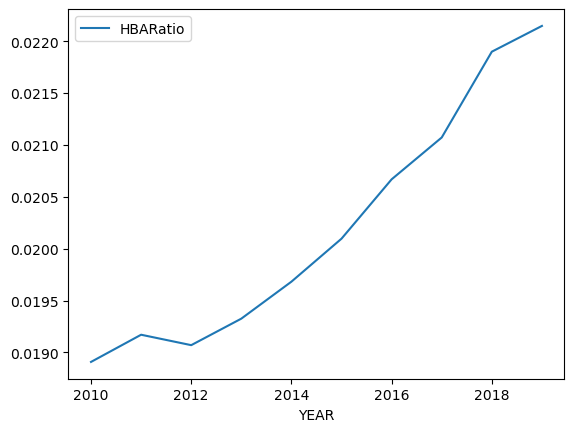

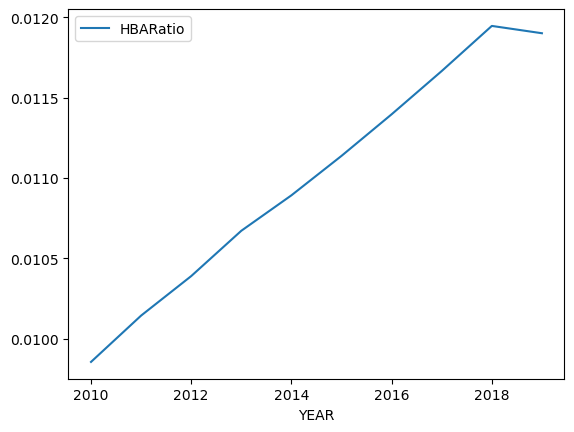

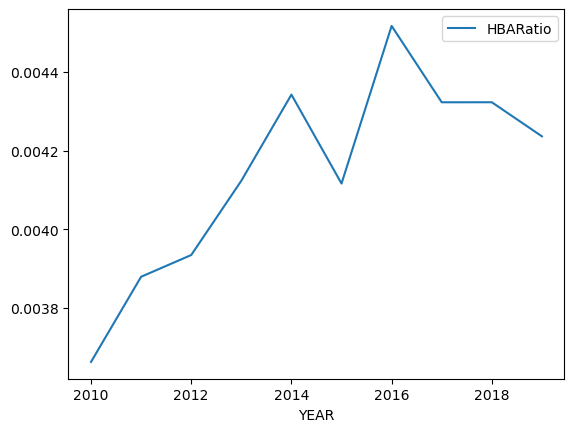

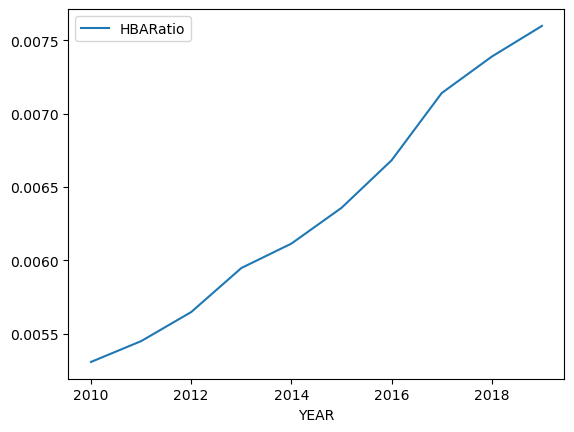

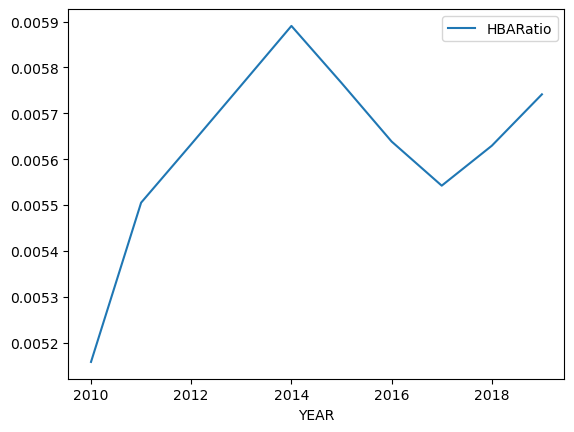

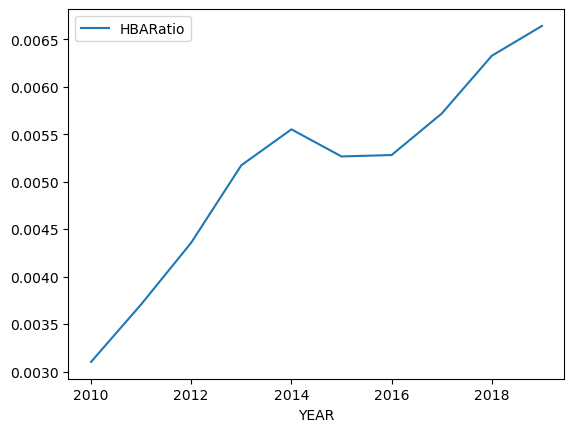

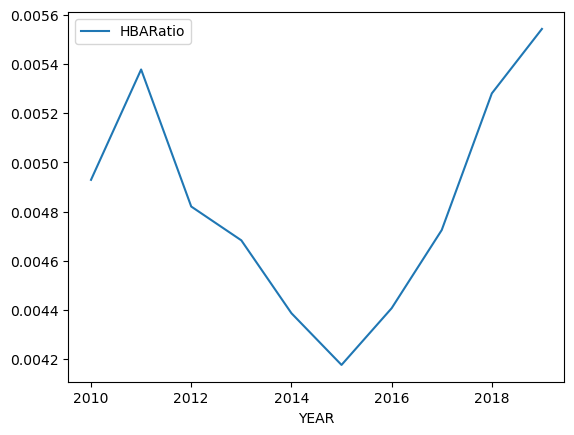

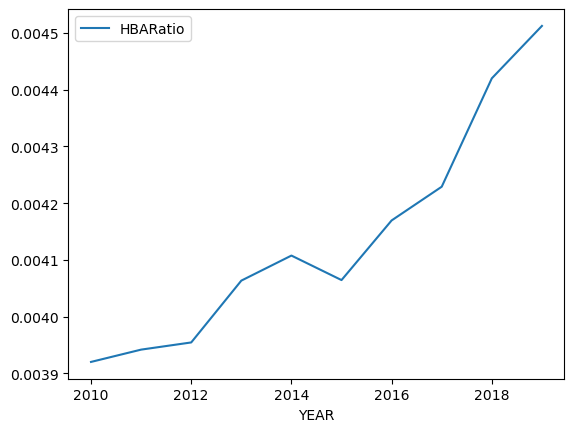

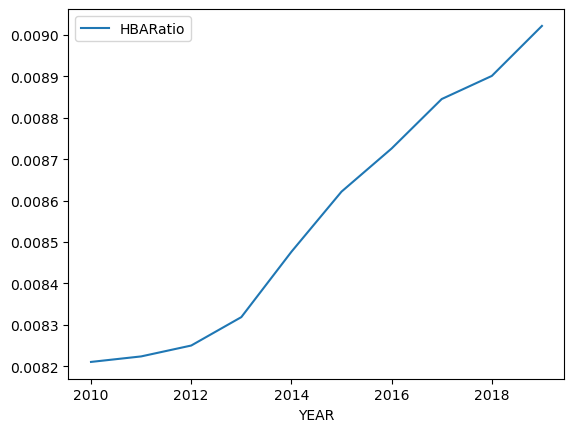

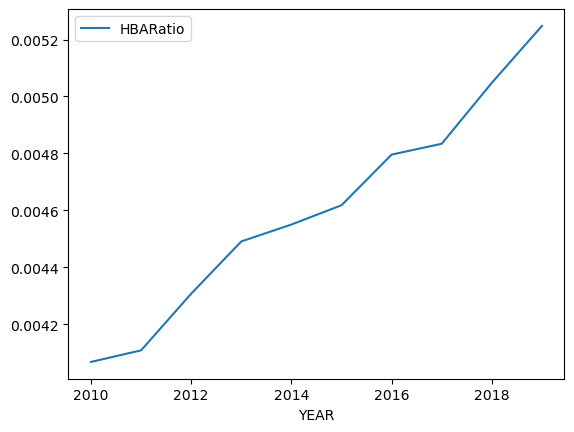

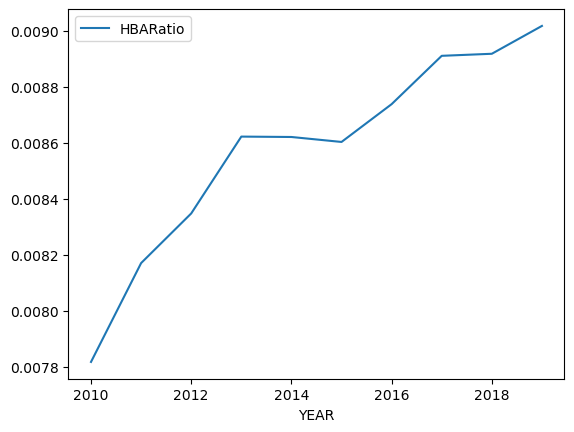

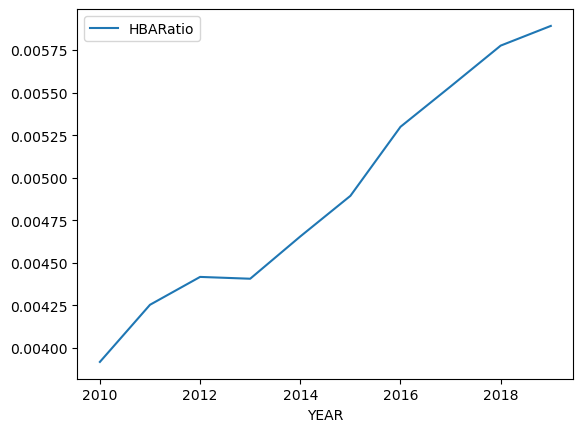

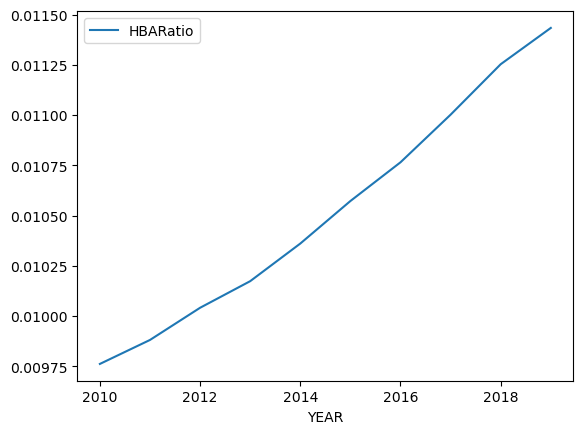

In [19]:
grp=df.groupby(['FENAME'])
legendnames = grp.apply(lambda x: x.FENAME)
plots = grp.plot('YEAR', 'HBARatio', legend=True)

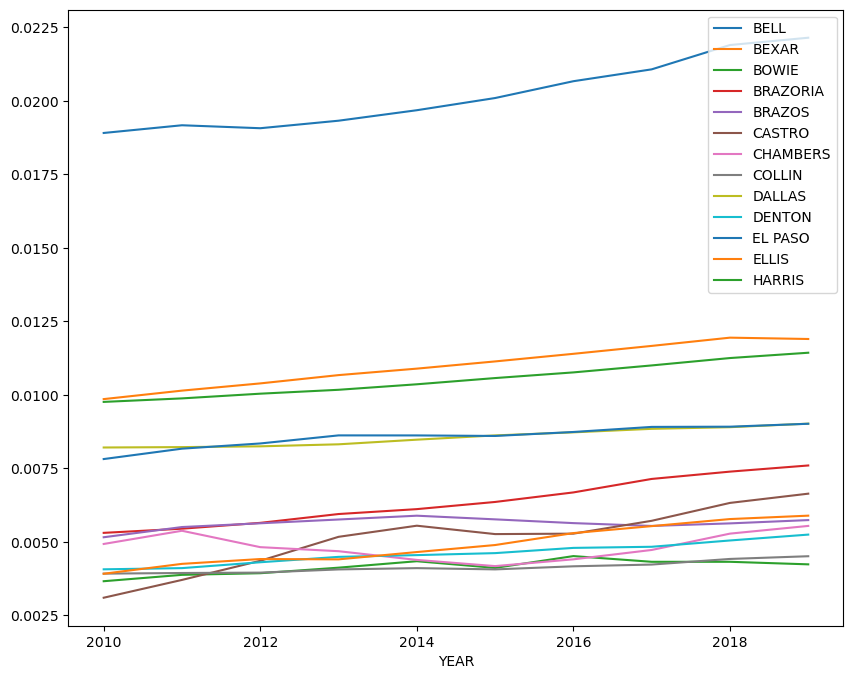

In [20]:
fig, ax = plt.subplots(figsize=(10,8))
thecounties = list(df.FENAME.unique())
for c in thecounties: 
    df1 = df[df['FENAME']== c]
    df1.plot(x='YEAR', y='HBARatio', kind='line', ax=ax, label=c)


<Axes: xlabel='YEAR'>

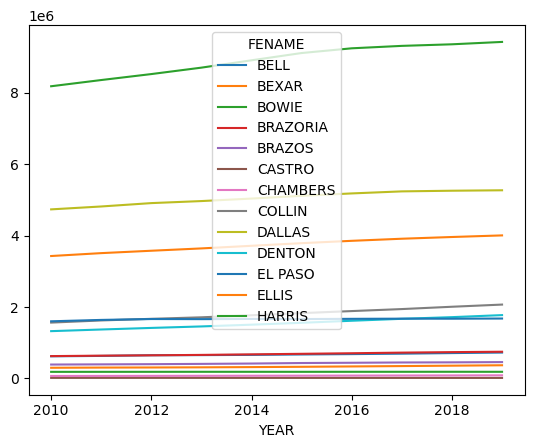

In [21]:
#total Population in the counties
df.groupby(['YEAR','FENAME'])['TOT_POP'].sum().unstack().plot()

<Axes: ylabel='FENAME'>

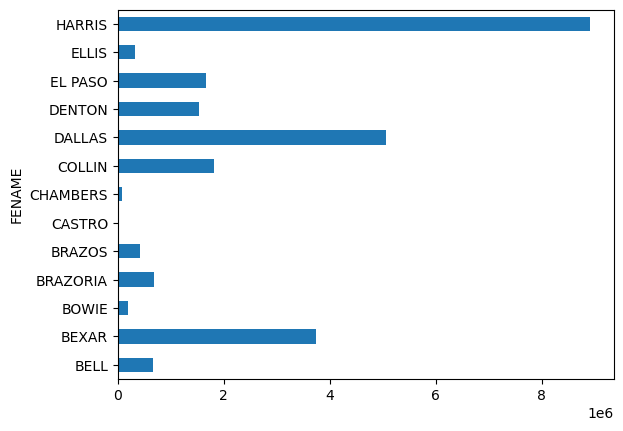

In [22]:
#Look at the mean of the population of the counties
df.groupby(['FENAME'])['TOT_POP'].mean().plot(kind='barh')

In [23]:

#Add Percentages Columns since the County Populations vary significantly
df['BlackOnly_Percentage'] = df['BA_All'] /df['TOT_POP']
df['WhiteOnly_Percentage'] =  df['WA_All'] /df['TOT_POP']
df['IndigenousOnly_Percentage'] =  df['IAC_All'] /df['TOT_POP']
df['HispanicsOnly_Percentage'] =  df['H_All'] /df['TOT_POP']
df['AsianOnly_Percentage'] =  df['AA_All'] /df['TOT_POP']
df['HispanicsandorBlack_Percentage'] = df['HBA_All'] /df['TOT_POP']
df[df['YEAR']==2019].describe()





,YEAR,SUMLEV,STATE,COUNTY,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,...,IAC_All,HBA_All,NHBA_All,HBARatio,BlackOnly_Percentage,WhiteOnly_Percentage,IndigenousOnly_Percentage,HispanicsOnly_Percentage,AsianOnly_Percentage,HispanicsandorBlack_Percentage
count,13.0,13.0,13.0,13.000000,13.0,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,...,13.000000,13.00000,1.300000e+01,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,2019.0,950.0,912.0,1626.692308,171.0,2.062986e+06,1.021339e+06,1.041647e+06,7.576463e+05,7.572060e+05,...,34501.384615,20366.00000,3.179697e+05,0.008380,0.136388,0.778859,0.017085,0.362166,0.050088,0.008380
std,0.0,0.0,0.0,1024.519349,0.0,2.724896e+06,1.350004e+06,1.374915e+06,9.625849e+05,9.502118e+05,...,46026.516643,30911.61842,5.382728e+05,0.004821,0.075620,0.096711,0.003141,0.218211,0.045330,0.004821
min,2019.0,950.0,912.0,513.000000,171.0,1.506000e+04,7.726000e+03,7.334000e+03,7.248000e+03,6.872000e+03,...,358.000000,100.00000,3.040000e+02,0.004236,0.026826,0.657413,0.012447,0.078428,0.006640,0.004236
25%,2019.0,950.0,912.0,741.000000,171.0,3.696520e+05,1.825540e+05,1.870980e+05,1.540540e+05,1.566840e+05,...,5706.000000,2178.00000,4.659800e+04,0.005543,0.086048,0.695621,0.014986,0.238064,0.013368,0.005543
50%,2019.0,950.0,912.0,1349.000000,171.0,7.485280e+05,3.781060e+05,3.704220e+05,2.845040e+05,2.761560e+05,...,15136.000000,9312.00000,1.075360e+05,0.006640,0.111740,0.756156,0.016516,0.268929,0.032665,0.006640
75%,2019.0,950.0,912.0,2299.000000,171.0,2.069460e+06,1.019112e+06,1.050348e+06,7.558960e+05,7.856300e+05,...,28554.000000,16076.00000,2.154460e+05,0.009022,0.199614,0.842562,0.019419,0.437275,0.069467,0.009022
max,2019.0,950.0,912.0,3819.000000,171.0,9.426650e+06,4.678886e+06,4.747764e+06,3.310276e+06,3.247102e+06,...,154244.000000,107780.00000,1.773912e+06,0.022148,0.254105,0.937583,0.023772,0.829461,0.162953,0.022148


<Axes: ylabel='FENAME'>

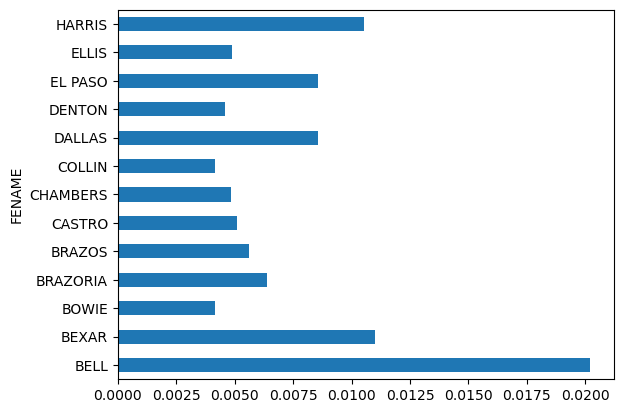

In [24]:
df.groupby(['FENAME'])['HispanicsandorBlack_Percentage'].mean().plot(kind='barh')

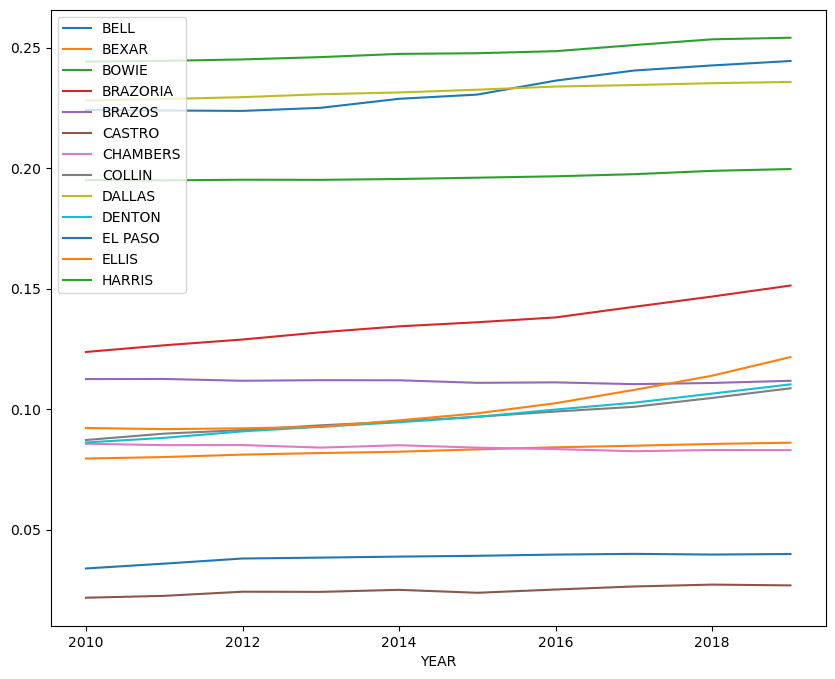

In [25]:
# Black Only Percentages in County
fig, ax = plt.subplots(figsize=(10,8))
thecounties = list(df.FENAME.unique())
for c in thecounties: 
    df1 = df[df['FENAME']== c]
    df1.plot(x='YEAR', y='BlackOnly_Percentage', kind='line', ax=ax, label=c)
  

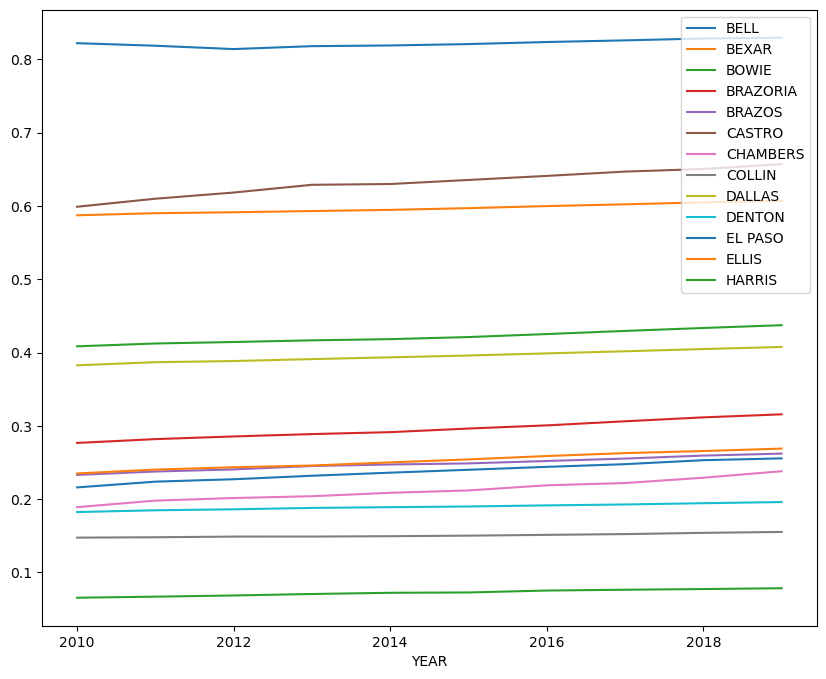

In [26]:
# Hispanics Only Percentages in County
fig, ax = plt.subplots(figsize=(10,8))
thecounties = list(df.FENAME.unique())
for c in thecounties: 
    df1 = df[df['FENAME']== c]
    df1.plot(x='YEAR', y='HispanicsOnly_Percentage', kind='line', ax=ax, label=c)

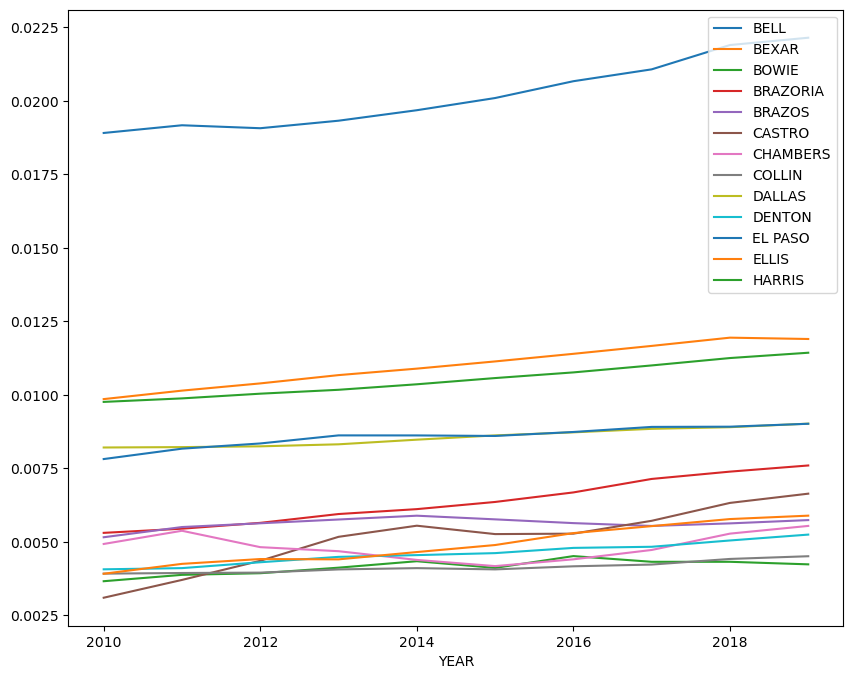

In [27]:
# Hispanic and Blacks Percentages in County
fig, ax = plt.subplots(figsize=(10,8))
thecounties = list(df.FENAME.unique())
for c in thecounties: 
    df1 = df[df['FENAME']== c]
    df1.plot(x='YEAR', y='HispanicsandorBlack_Percentage', kind='line', ax=ax, label=c)

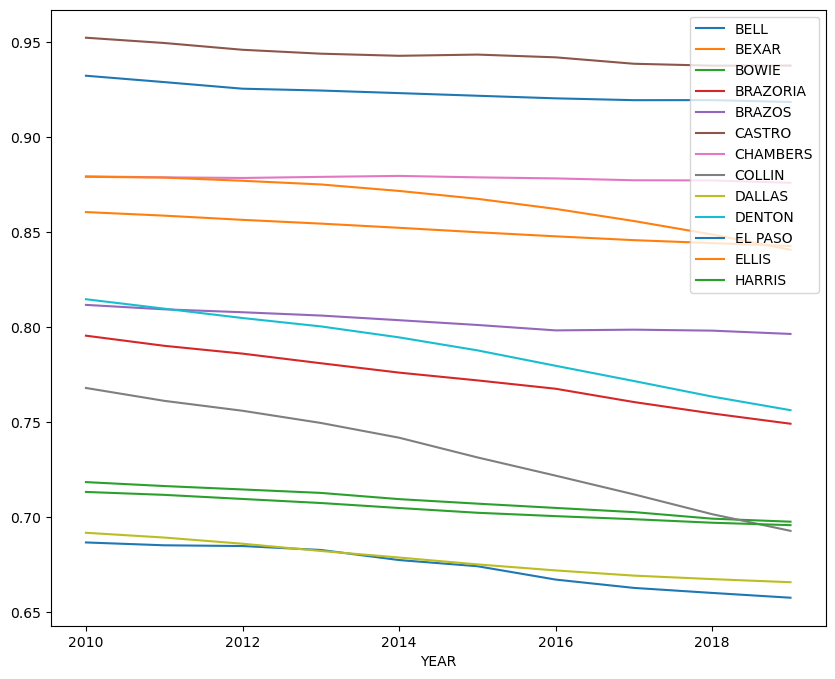

In [28]:
# White Only Percentages in County
fig, ax = plt.subplots(figsize=(10,8))
thecounties = list(df.FENAME.unique())
for c in thecounties: 
    df1 = df[df['FENAME']== c]
    df1.plot(x='YEAR', y='WhiteOnly_Percentage', kind='line', ax=ax, label=c)

<Axes: ylabel='FENAME'>

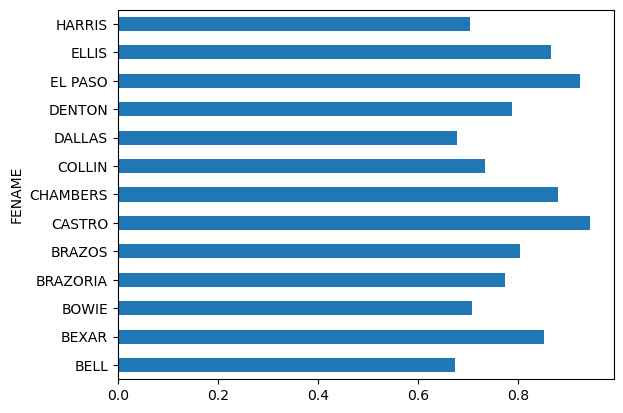

In [29]:
df.groupby(['FENAME'])['WhiteOnly_Percentage'].mean().plot(kind='barh')

Based on the analysis, the white only percentage of the counties are decreasing (significantly in Collin, Brazoria and Bexar County), while slightly in others. 
* Castro County has the highest percentage of White only residents, while Bell has the lowest percentage
* Bell has the highest percentage of Hispanic and Black residents, while Bowie has the lowest percentage